In [189]:
import sys
#!{sys.executable} -m pip install tweepy

import tweepy
import csv
import json

class TweetSearch(object):

    def __init__(self, hashtag):
        with open('twitter_credentials.json') as cred_data:
            self.keys = json.load(cred_data)

        self.hashtag = hashtag
        self.maximum_number_of_tweets_to_be_extracted = 10
        
        
        

    def scrape_tweets_by_hashtag(self):
        auth = tweepy.OAuthHandler(self.keys['CONSUMER_KEY'], self.keys['CONSUMER_SECRET'])
        api = tweepy.API(auth)

        with open('tweets_' + self.hashtag + '.csv', 'a') as out_file:
            writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            for tweet in tweepy.Cursor(api.search, q='#' + self.hashtag, rpp=100, tweet_mode='extended').items(self.maximum_number_of_tweets_to_be_extracted):
                    try:
                        writer.writerow([tweet.retweeted_status.full_text.replace('\n', ' ').replace('\r', '').encode('ascii',errors='replace') if hasattr(tweet, 'retweeted_status') else tweet.full_text.replace('\n', ' ').replace('\r', '').encode('ascii',errors='replace'), tweet.user.followers_count, tweet.retweet_count, tweet.user.screen_name, list(map(lambda x: x['text'], tweet.entities['hashtags']))])
                    except UnicodeEncodeError:
                        continue
                    except:
                        print('somethings gone very wrong: ' + tweet.full_text)

                        
        print('Extracted ' + str(self.maximum_number_of_tweets_to_be_extracted) + ' tweets with hashtag #' + self.hashtag)
        
        
        
        
        
    def scrape_tweets_by_user(self, user):
        auth = tweepy.OAuthHandler(self.keys['CONSUMER_KEY'], self.keys['CONSUMER_SECRET'])
        api = tweepy.API(auth)

        with open('tweets_' + user + '.csv', 'w', newline='') as out_file:
            writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            for tweet in tweepy.Cursor(api.user_timeline, id=user, tweet_mode='extended').items():
                    try:
                        writer.writerow([tweet.retweeted_status.full_text.replace('\n', ' ').replace('\r', '').encode('ascii',errors='replace') if hasattr(tweet, 'retweeted_status') else tweet.full_text.replace('\n', ' ').replace('\r', '').encode('ascii',errors='replace'), tweet.user.followers_count, tweet.retweet_count, tweet.user.screen_name, tweet.created_at, tweet.favorite_count, list(map(lambda x: x['text'], tweet.entities['hashtags']))]) if hasattr(tweet, 'retweeted_status') else writer.writerow([tweet.full_text.replace('\n', ' ').replace('\r', ''), tweet.user.followers_count, tweet.retweet_count, tweet.user.screen_name, tweet.created_at, tweet.favorite_count, list(map(lambda x: x['text'], tweet.entities['hashtags']))])
                    except UnicodeEncodeError:
                        continue
                    except:
                        print('somethings gone very wrong: ' + tweet.full_text)
                        
                        
        print('Extracted tweets from user' + user)
                        

In [190]:
app = TweetSearch("coronavirus")

### Now turn csv into pandas dataframe

In [135]:
#!{sys.executable} -m pip install pandas
import pandas as pd

data = pd.read_csv(open('tweets_coronavirus.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "hashtags"] )
# Preview the first 5 lines of the loaded data 
data.head()

,tweet content,followers count,retweet count,user,hashtags
0,Coronavirus: Scottish universities boosted by ...,519,0,corona_scotnews,"['coronavirus', 'covid19']"
1,#Brazil's President #Bolsonaro tests positive ...,1564,0,MsPasty,"['Brazil', 'Bolsonaro', 'coronavirus']"
2,RT @jaimeberenguer: Adivinanza. ¿Cuál es el ún...,108,682,KevinDukeZ,[]
3,RT @HealthZA: Here are the things you need to ...,374,4,SelloPelo3,"['COVID19', 'CoronaVirus', 'Corona']"
4,‘A shameful picture’: First Minister says gove...,519,0,corona_scotnews,"['coronavirus', 'covid19']"


In [136]:
#from pandas.core.common import flatten
#flatten = list(flatten(data['hashtags']))

#flattened = list(map(lambda x: x, data['hashtags']))
#flattened
import re

hashtag_list = []

for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    


hashtag_list

[['coronavirus', 'covid19'],
 ['Brazil', 'Bolsonaro', 'coronavirus'],
 [],
 ['COVID19', 'CoronaVirus', 'Corona'],
 ['coronavirus', 'covid19'],
 ['coronavirus', 'covid19'],
 ['CORONAVÍRUS'],
 ['coronavírus',
  'povosindígenas',
  'genocida',
  'vidasindigenasimportam',
  'pareogenocídio'],
 [],
 ['PPP',
  'Bailout',
  'Billionaires',
  'Trump',
  'Kushner',
  'Kanye',
  'BigOil',
  'Pharma',
  'Vaccines',
  'Lobbyists',
  'Dra'],
 ['HerdImmunityScandal'],
 ['Coronavirus', 'ECM'],
 ['Coronavirus', 'ECM'],
 ['Coronavirus', 'ECM'],
 ['Coronavirus', 'ECM'],
 ['Coronavirus', 'StockMarket', 'RockBottom', 'WhatComesNext'],
 ['Coronavirus', 'ECM'],
 ['coronavirus', 'TrumpVirus'],
 ['Pandemia', 'coronavirus', 'Chile'],
 ['COVID19'],
 ['CoronaVirus', 'schoolshootings', 'Trumpregime'],
 ['covid19', 'coronavirus'],
 [],
 ['Coronavírus'],
 [],
 ['COVID19', 'pandemia'],
 [],
 ['Coronavirus', 'Andalucía'],
 [],
 ['coronavirus'],
 ['EFETV', 'coronavirus'],
 ['Coronavirus', 'AMBA', 'Rosario', 'Cordoba']

In [137]:
from pandas.core.common import flatten
flattened = list(flatten(hashtag_list))
flattened

['coronavirus',
 'covid19',
 'Brazil',
 'Bolsonaro',
 'coronavirus',
 'COVID19',
 'CoronaVirus',
 'Corona',
 'coronavirus',
 'covid19',
 'coronavirus',
 'covid19',
 'CORONAVÍRUS',
 'coronavírus',
 'povosindígenas',
 'genocida',
 'vidasindigenasimportam',
 'pareogenocídio',
 'PPP',
 'Bailout',
 'Billionaires',
 'Trump',
 'Kushner',
 'Kanye',
 'BigOil',
 'Pharma',
 'Vaccines',
 'Lobbyists',
 'Dra',
 'HerdImmunityScandal',
 'Coronavirus',
 'ECM',
 'Coronavirus',
 'ECM',
 'Coronavirus',
 'ECM',
 'Coronavirus',
 'ECM',
 'Coronavirus',
 'StockMarket',
 'RockBottom',
 'WhatComesNext',
 'Coronavirus',
 'ECM',
 'coronavirus',
 'TrumpVirus',
 'Pandemia',
 'coronavirus',
 'Chile',
 'COVID19',
 'CoronaVirus',
 'schoolshootings',
 'Trumpregime',
 'covid19',
 'coronavirus',
 'Coronavírus',
 'COVID19',
 'pandemia',
 'Coronavirus',
 'Andalucía',
 'coronavirus',
 'EFETV',
 'coronavirus',
 'Coronavirus',
 'AMBA',
 'Rosario',
 'Cordoba',
 'Coronavirus',
 'COVID19',
 'Kazakhstan',
 'coronavirus',
 'WasteS

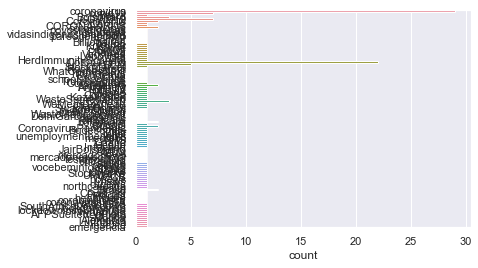

In [111]:
#!{sys.executable} -m pip install seaborn
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y=flattened)

In [138]:
import collections

counter=collections.Counter(flattened)
counter.most_common(10)

[('coronavirus', 316),
 ('Coronavirus', 232),
 ('COVID19', 75),
 ('GreenRecovery', 48),
 ('covid19', 29),
 ('Covid19', 25),
 ('PMGKAY', 21),
 ('CoronaVirus', 19),
 ('WHO', 14),
 ('Trump', 13)]










## Now moving on to #covid19

In [139]:
app = TweetSearch("covid19")

Extracted 1000 tweets with hashtag #covid19


In [140]:
import pandas as pd

data = pd.read_csv(open('tweets_covid19.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "hashtags"] )
# Preview the first 5 lines of the loaded data 
data.head()

,tweet content,followers count,retweet count,user,hashtags
0,RT @telesurenglish: #Bolivia | Interior Minist...,5682,14,Eire353,"['Bolivia', 'COVID19', 'Coronavirus', 'pandemic']"
1,#Israel facing #corona catastrophe - #covid19 ...,45,0,IsraelBayit,"['Israel', 'corona', 'covid19', 'coronavirus']"
2,RT @Wotsgoinon2: #melbournelockdown #MELBOURN...,45166,1,CllrBSilvester,"['melbournelockdown', 'MELBOURNESCOVIDPRISONS'..."
3,RT @hgilberds: Global international assistance...,923,2,NieuwBloem,['COVID19']
4,RT @AzeefaFathima: #Virudhunagar dist administ...,8,6,kumarnirmal55,"['Virudhunagar', 'COVID19']"


In [141]:
hashtag_list = []

for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    

In [142]:
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

[('COVID19', 393),
 ('Covid19', 122),
 ('covid19', 52),
 ('coronavirus', 41),
 ('ZeroCovid', 14),
 ('Coronavirus', 13),
 ('Delhi', 12),
 ('Blood', 12),
 ('COVID1', 9),
 ('DataTerbaruCorona', 8)]

## What about #lockdown

In [143]:
app = TweetSearch("lockdown")
data = pd.read_csv(open('tweets_lockdown.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "hashtags"] )
# Preview the first 5 lines of the loaded data 
data.head()
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

Extracted 1000 tweets with hashtag #lockdown


[('lockdown', 332),
 ('COVID19', 85),
 ('Lockdown', 66),
 ('FarmMurders', 38),
 ('FarmAttacks', 38),
 ('covid19', 24),
 ('Varanasi', 23),
 ('coronavirus', 22),
 ('Autostrade', 14),
 ('Belgrade', 12)]

## Now for organisations, starting with WHO

In [192]:
app.scrape_tweets_by_user('WHO')

Extracted tweets from userWHO


In [193]:
data = pd.read_csv(open('tweets_WHO.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
data.head()

,tweet content,followers count,retweet count,user,created at,favourite count,hashtags
0,"b""Believe in yourself - you're more powerful t...",8071452,79,WHO,2020-07-11 22:30:27,0,[]
1,b'To beat the #COVID19 pandemic and ensure tha...,8071452,161,WHO,2020-07-11 10:42:56,0,"['COVID19', 'HIV']"
2,b'At the same #AIDS conference where Nkosi bro...,8071452,70,WHO,2020-07-11 10:42:52,0,['AIDS']
3,b'We are concerned about the impact of #COVID1...,8071452,53,WHO,2020-07-11 10:42:50,0,"['COVID19', 'HIV']"
4,b'20 yrs ago at the Durban Aids conference Nko...,8071452,226,WHO,2020-07-11 10:42:46,0,[]


In [194]:
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

[('COVID19', 1488),
 ('WHA73', 116),
 ('coronavirus', 110),
 ('HealthForAll', 85),
 ('Ebola', 77),
 ('VaccinesWork', 69),
 ('DRC', 61),
 ('healthworkers', 60),
 ('TobaccoExposed', 52),
 ('HealthyAtHome', 43)]

In [186]:
len(flattened)

3111

## Johns Hopkins Center for Health Security @JHSPH_CHS

In [191]:
app.scrape_tweets_by_user('JHSPH_CHS')
data = pd.read_csv(open('tweets_JHSPH_CHS.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

Extracted tweets from userJHSPH_CHS


[('publichealth', 183),
 ('CladeX', 163),
 ('Ebola', 125),
 ('OutbreakThursday', 109),
 ('COVID19', 107),
 ('biosecurity', 94),
 ('healthsecurity', 91),
 ('flu', 79),
 ('influenza', 76),
 ('globalhealth', 72)]

## COVID-19 Experts/Centers @JohnsHopkins

In [195]:
app.scrape_tweets_by_user('JohnsHopkins')
data = pd.read_csv(open('tweets_JohnsHopkins.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

Extracted tweets from userJohnsHopkins


[('COVID19', 234),
 ('coronavirus', 72),
 ('GoHop', 68),
 ('JHUAPL', 46),
 ('HopkinsEngineer', 43),
 ('JHUAlumni', 43),
 ('JHU2019', 34),
 ('SNFAgora', 31),
 ('JHU2020', 30),
 ('Baltimore', 27)]

## institute for health metrics and evaluation, U of Washington @IHME_UW

In [199]:
app.scrape_tweets_by_user('IHME_UW')
data = pd.read_csv(open('tweets_IHME_UW.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

[('COVID19', 475),
 ('coronavirus', 39),
 ('GBDStudy', 27),
 ('GBDstudy', 27),
 ('publichealth', 21),
 ('PopulationHealth', 18),
 ('globalhealth', 18),
 ('Brazil', 15),
 ('malaria', 15),
 ('COVID', 14)]

## CDC @CDCgov

In [200]:
app.scrape_tweets_by_user('CDCgov')
data = pd.read_csv(open('tweets_CDCgov.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

[('COVID19', 799),
 ('Ebola', 113),
 ('DYK', 95),
 ('flu', 86),
 ('HIV', 78),
 ('coronavirus', 76),
 ('DRC', 74),
 ('HCPs', 51),
 ('2019nCoV', 49),
 ('BreastCancer', 47)]

## Public Health England @PHE_uk

In [201]:
app.scrape_tweets_by_user('PHE_uk')
data = pd.read_csv(open('tweets_PHE_uk.csv', errors='replace'), names=["tweet content", "followers count", "retweet count", "user", "created at", "favourite count", "hashtags"] )
hashtag_list = []
for l in data['tweet content']:
    hashtag_list.append(re.findall(r"#(\w+)", l))
    
    
flattened = list(flatten(hashtag_list))
counter=collections.Counter(flattened)
counter.most_common(10)

[('coronavirus', 246),
 ('COVID19', 238),
 ('PHEHealthMatters', 193),
 ('EveryMindMatters', 118),
 ('PHEConf19', 114),
 ('ValueofVaccines', 89),
 ('StayHomeSaveLives', 65),
 ('flu', 57),
 ('AllOurHealth', 47),
 ('Coronavirus', 44)]

## Now time for premium search

In [202]:
import sys
#!{sys.executable} -m pip install TwitterAPI

import TwitterAPI
import csv
import json

class PremiumTweetSearch(object):

    def __init__(self, hashtag):
        with open('twitter_credentials.json') as cred_data:
            self.keys = json.load(cred_data)

        self.maximum_number_of_tweets_to_be_extracted = 10
        self.SEARCH_TERM = '#coronavirus OR #covid19'
        self.PRODUCT = 'fullarchive'
        
        
        

    def scrape_tweets_by_hashtag(self):
        api = TwitterAPI(self.keys['CONSUMER_KEY'], self.keys['CONSUMER_SECRET'], self.keys['ACCESS_KEY'], self.keys['ACCESS_SECRET'])
        with open('tweets_premium_test.csv', 'a') as out_file:
            writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            r = api.request('tweets/search/30day/dev',
                    {'query':YOUR_SEARCH_TERMS, 'fromDate':202006250000, 'toDate':202006280000})
            for item in r:
                print(item['text'])

                

  Stored in directory: C:\Users\Reuben\AppData\Local\pip\Cache\wheels\75\2b\7f\eeba50e75a41f8b3b30ebf9af36282a6804590e3c02f43215f
Successfully built TwitterAPI

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
